<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_preg      768 non-null    int64  
 1   glucose_conc  768 non-null    int64  
 2   diastolic_bp  768 non-null    int64  
 3   thickness     768 non-null    int64  
 4   insulin       768 non-null    int64  
 5   bmi           768 non-null    float64
 6   diab_pred     768 non-null    float64
 7   age           768 non-null    int64  
 8   skin          768 non-null    float64
 9   diabetes      768 non-null    bool   
dtypes: bool(1), float64(3), int64(6)
memory usage: 54.9 KB
Missing Values: num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64
Random Forest Accuracy: 0.7402597402597403
Confusion Matrix:
 [[120  31]
 [ 29  51]]
Classification Report:
  

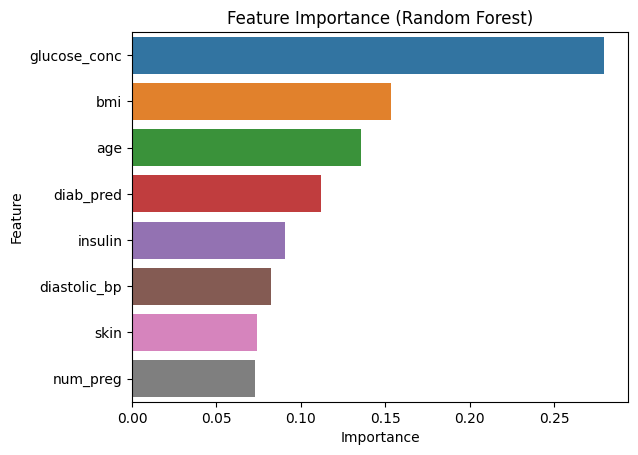

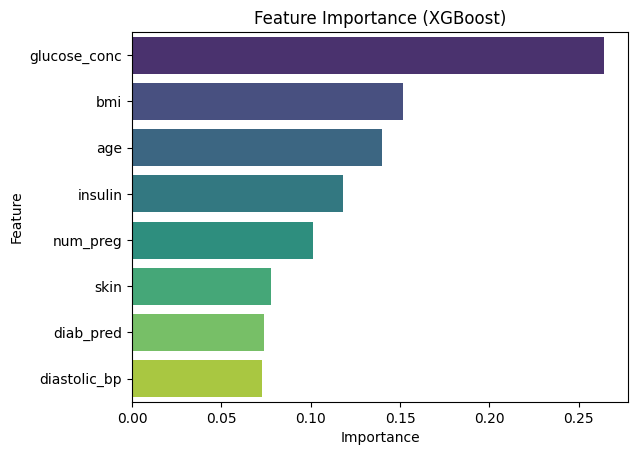

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Step 1: Load Dataset
data = pd.read_csv("pima-data.csv")

# Display dataset information
data.info()

# Step 2: Data Preprocessing
# Check for missing values
print("Missing Values:", data.isnull().sum())

# Handle missing values (replace 0s with mean in specific columns)
columns_to_impute = ['glucose_conc', 'diastolic_bp', 'insulin', 'bmi', 'skin']
for col in columns_to_impute:
    data[col] = data[col].replace(0, np.nan)
    data[col].fillna(data[col].mean(), inplace=True)

# Convert target variable to binary
diabetes_map = {True: 1, False: 0}
data['diabetes'] = data['diabetes'].map(diabetes_map)

# Step 3: Feature Selection
feature_columns = ['num_preg', 'glucose_conc', 'diastolic_bp', 'insulin', 'bmi', 'diab_pred', 'age', 'skin']
X = data[feature_columns]
y = data['diabetes']

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Model Training
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Step 6: Evaluation
rf_predictions = random_forest_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))

# Step 7: Hyperparameter Tuning with XGBoost
params = {
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [3, 4, 5],
    "min_child_weight": [1, 3, 5],
    "gamma": [0.0, 0.1, 0.2],
    "colsample_bytree": [0.3, 0.5, 0.7]
}

xgb_model = xgb.XGBClassifier()
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=params, scoring='accuracy', n_iter=10, cv=3, random_state=42)

random_search.fit(X_train, y_train)
best_xgb_model = random_search.best_estimator_

# Evaluate XGBoost Model
xgb_predictions = best_xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_predictions))
print("Classification Report:\n", classification_report(y_test, xgb_predictions))

# Step 8: Visualization

# Feature Importance Visualization (Random Forest)
feature_importances = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': random_forest_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importance (Random Forest)")
plt.show()

# Feature Importance Visualization (XGBoost)
xgb_feature_importances = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': best_xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=xgb_feature_importances, palette='viridis')
plt.title("Feature Importance (XGBoost)")
plt.show()



